<a href="https://colab.research.google.com/github/efugal18-afk/IS-4487/blob/main/Assignments/assignment_04_FugalEric.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# IS4487 Week 4 - Assignment

### Outline

Our Goals with this Project:

1. Import and review the data
2. Perform EDA and Clean Data

<a href="https://colab.research.google.com/github/Stan-Pugsley/is_4487_base/blob/main/Assignments/assignment_04_data_understanding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Case: AdviseInvest
You work on a small team of data analysts at AdviseInvest, a venture-backed startup. The Director of Sales at AdviseInvest has approached your team asking for help solving a staffing problem.

### The Company
The company's mission is to provide tools and support to help ordinary people gain control of their personal finances. The company leverages technology to provide affordable financial advice to a national client base.

Customers who reach AdviseInvest's website go through five steps:

- Open an account.
- Complete a customer profile form with basic information about their background and finances.
- Schedule a free phone conversation with a sales representative during a 1-hour window of time.
- Attend the free phone conversation.
- Buy a financial plan.
- There are three types of financial plans: Beginner, Intermediate, and Advanced. Each is sold at a different price, and there are varying degrees of personalization. After a customer purchases a financial plan, the customer is assigned a financial planner who helps determine the customer's goals and advises the customer on spending decisions.

### The Problem
Some customers are lost at each stage of the process. Steps 3 and 4 are particularly challenging because approximately 50% of those who schedule a phone conversation fail to pick up the call. This leads to inefficiencies from a staffing perspective.

AdviseInvest has 4 sales reps on staff during each particular 1-hour window. Each of the 4 reps is assigned 2 prospective customers per hour, which means that the company schedules a total of 8 phone calls per hour. The calls are outgoing: sales reps call customers who scheduled a phone conversation during that hour window.

Unfortunately, as noted above, many of the customers who scheduled a call do not answer. As a consequence, sales reps are often left underutilized. Moreover, they are underutilized unevenly. For example, it is possible that one sales rep will not do any sales calls during that hour, whereas another will be busy the entire hour with two calls. Sales reps have nothing to do when customers do not answer the scheduled phone call.

For this assignment, the variable `answered` is your target.  

### AdviseInvest Data Dictionary

| Variable | Description | Type | Code |
|:---|:---|:---|:---|
| Answered | Customer response | Binary | 0: customer did not answer scheduled call; 1: customer answered scheduled call |
| Income | Customer income in US dollars | Numeric | |
| Female | Customer gender | Binary | 0: female; 1: male |
| Age | Age in years | Numeric | |
| Job | Nature of job | Categorical | 0 : unemployed; 1 : entry level position; 2 : midlevel position; 3 : management/ self-employed/ highly qualified employee/ officer |
| Num_dependents | Number of people for whom the customer provides maintenance | Numeric | |
| Rent | Customer rents | Binary | 0: no; 1: yes |
| Own_res | Customer owns residence | Binary | 0: no; 1: yes |
| New_car | Recent new car purchase | Binary | New car purchase in the last 3 months: 0: no, 1: yes |
| Chk_acct | Checking account status | Categorical | 0 : no checking account; 1: checking < 200 USD; 2 : 200 < checking < 2000 USD; 3: 2000 < checking < 35000 USD; 4: >= 3500 USD |
| Sav_acct | Average balance in savings account | Categorical | 0 : no savings account; 1 : 100 <= savings < 500 USD; 2 : 500 <= savings < 2000 USD; 3 : 2000 < savings < 35000 USD; 4: >= 3500 USD |
| Num_accts | Number of accounts owned by customer | Numeric | |
| Mobile | Mobile phone | Binary | 0: customer provided non‐mobile phone for follow‐up call; 1: customer provided mobile phone for follow‐up call |
| Product | Type of product purchased after conversation with sales rep | Categorical | 0: customer did not answer call; 1: customer answered but did not purchase a product; 2: customer answered and purchased Beginner plan; 3: customer answered and purchased Intermediate plan; 4: customer answered and purchased Advanced plan |


### Load Libraries

Import the libraries you will need, such as:
- Pandas
- Sklearn
- Matplotlib


In [19]:
#Import libraries 🔧
import pandas as pd
import sklearn as sk
import matplotlib.pyplot as plt

## Step 1: Initial Data Understanding

### Do the following:
 - Import data from the AdviseInvest historical dataset into a dataframe (in GitHub go to Assignments > DataSets)
 - Describe or profile the dataframe
 - Think about if there are any outliers, missing values, or duplicates.  We will cover those topics next week.  

In [20]:
#Import the data 🔧
df = pd.read_csv('/content/adviseinvest_historical_data.csv')
display(df.head())

,answered,income,female,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
0,1,13520,0,23,0,1,1,0,0.0,0,2,0,1,2
1,0,14780,0,22,2,1,0,1,0.0,3,0,3,0,0
2,1,37570,0,62,2,1,0,0,1.0,3,0,4,0,4
3,0,12450,0,33,2,1,0,1,0.0,1,0,2,0,0
4,0,12400,0,48,1,2,0,0,1.0,2,1,4,0,0


In [21]:
#View the datatypes 🔧
df.dtypes

,0
answered,int64
income,int64
female,object
age,int64
job,int64
num_dependents,int64
rent,int64
own_res,int64
new_car,float64
chk_acct,int64


In [22]:
#Describe the data 🔧
display(df.describe())

,answered,income,age,job,num_dependents,rent,own_res,new_car,chk_acct,sav_acct,num_accts,mobile,product
count,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000,29502.000000,29504.000000,29504.000000,29504.000000,29504.000000,29504.000000
mean,0.546638,33766.893303,34.773454,1.915401,1.140998,0.210412,0.681128,0.240797,1.468547,0.956616,2.458345,0.091106,1.535792
std,0.497829,29379.202710,11.369865,0.658183,0.348025,0.407608,0.466047,0.427575,1.234727,1.483946,19.497380,0.287765,1.625916
min,0.000000,-65600.000000,19.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,13550.000000,26.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
50%,1.000000,23310.000000,32.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,0.000000,1.000000
75%,1.000000,41690.000000,40.000000,2.000000,1.000000,0.000000,1.000000,0.000000,3.000000,2.000000,3.000000,0.000000,3.000000
max,1.000000,159450.000000,132.000000,3.000000,2.000000,1.000000,1.000000,1.000000,3.000000,4.000000,3345.000000,1.000000,4.000000


# Step 2: Begin to Explore the Data

We will learn more about Exploratory Data Analysis (EDA) in Week 5. The following steps are to help you connect the data visualization steps that we practiced last week with the process of data understanding - learning more about the dataset and finding the data quality issues that need to be addressed.   These are the first steps in EDA.

### Do the following:
- Explore the relationships between the target and independent variables
- Create at least five charts to show the relationships, using different chart types that are approriate to the analysis
- Ensure that all charts are clearly labeled and formatted

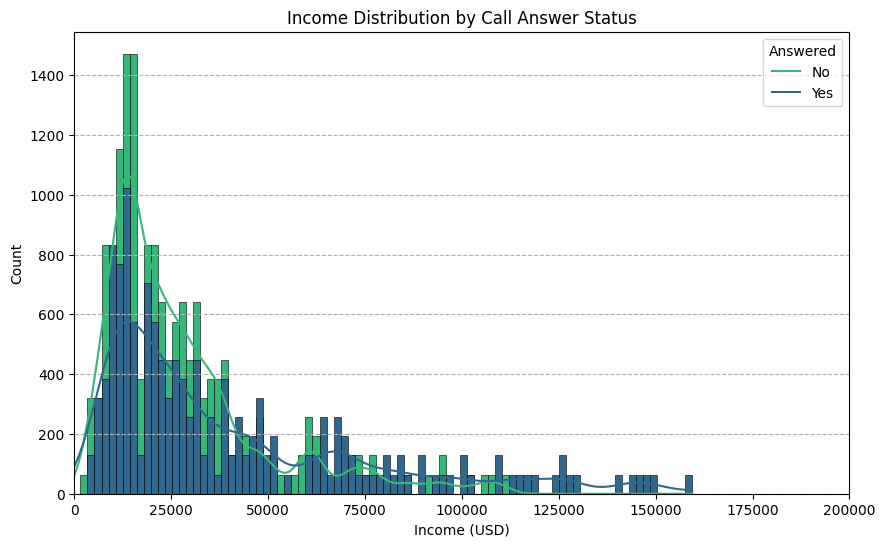

In [34]:
# Chart 1 🔧
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='income', hue='answered', kde=True, palette='viridis', alpha=1)
plt.title('Income Distribution by Call Answer Status')
plt.xlabel('Income (USD)')
plt.xlim(0,200000)
plt.ylabel('Count')
plt.legend(title='Answered', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=1)
plt.show()

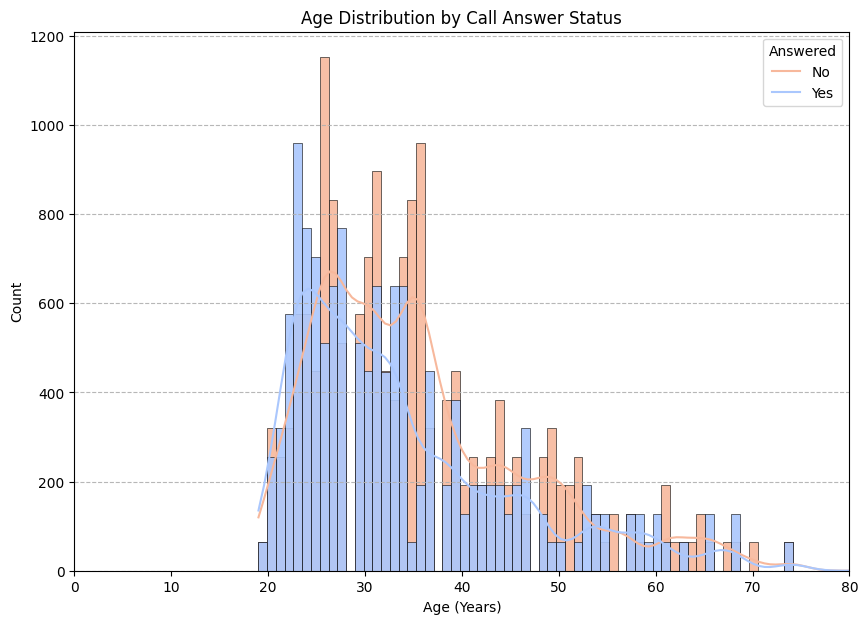

In [35]:
# Chart 2 🔧
import seaborn as sns

plt.figure(figsize=(10, 7))
sns.histplot(data=df, x='age', hue='answered', kde=True, palette='coolwarm', alpha=0.9)
plt.title('Age Distribution by Call Answer Status')
plt.xlabel('Age (Years)')
plt.xlim(0,80)
plt.ylabel('Count')
plt.legend(title='Answered', labels=['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.9)
plt.show()

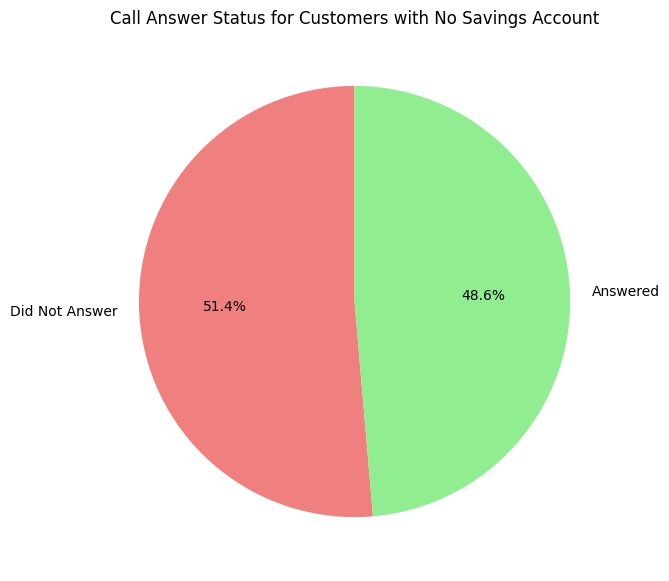

In [45]:
# Chart 3 🔧

# Filter for customers with sav_acct category 0 (no savings account)
unemployed_df = df[df['sav_acct'] == 0]
unemployed_answered_counts = unemployed_df['answered'].value_counts()

# Check if unemployed_answered_counts is empty and handle it
if unemployed_answered_counts.empty:
    print("No data available for customers with no savings account to plot.")
else:
    plt.figure(figsize=(7, 7))
    plt.pie(unemployed_answered_counts, labels=['Did Not Answer', 'Answered'], autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
    plt.title('Call Answer Status for Customers with No Savings Account')
    plt.ylabel('') # Hide default 'answered' label
    plt.show()

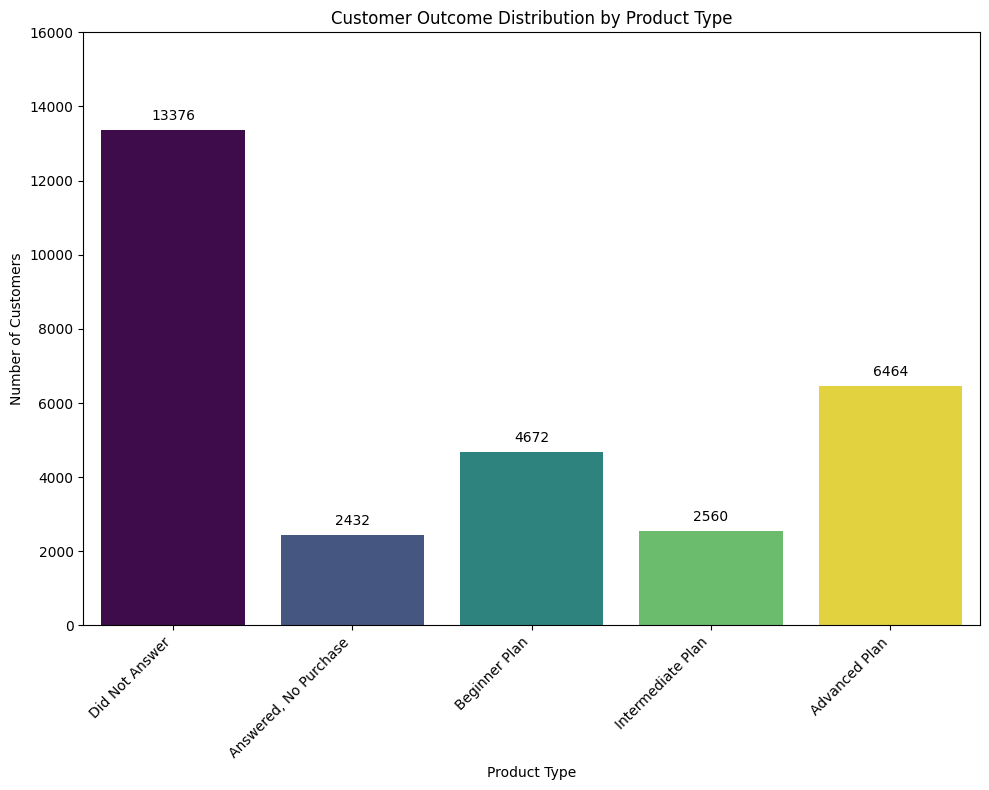

In [48]:
# Chart 4 🔧
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
ax = sns.countplot(data=df, x='product', hue='product', palette='viridis', legend=False)
plt.title('Customer Outcome Distribution by Product Type')
plt.xlabel('Product Type')
plt.ylabel('Number of Customers')
plt.ylim(0, 16000)

# Customizing x-axis labels for better readability
product_labels = {
    0: 'Did Not Answer',
    1: 'Answered, No Purchase',
    2: 'Beginner Plan',
    3: 'Intermediate Plan',
    4: 'Advanced Plan'
}
plt.xticks(ticks=sorted(product_labels.keys()), labels=[product_labels[key] for key in sorted(product_labels.keys())], rotation=45, ha='right')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

# Removed: plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

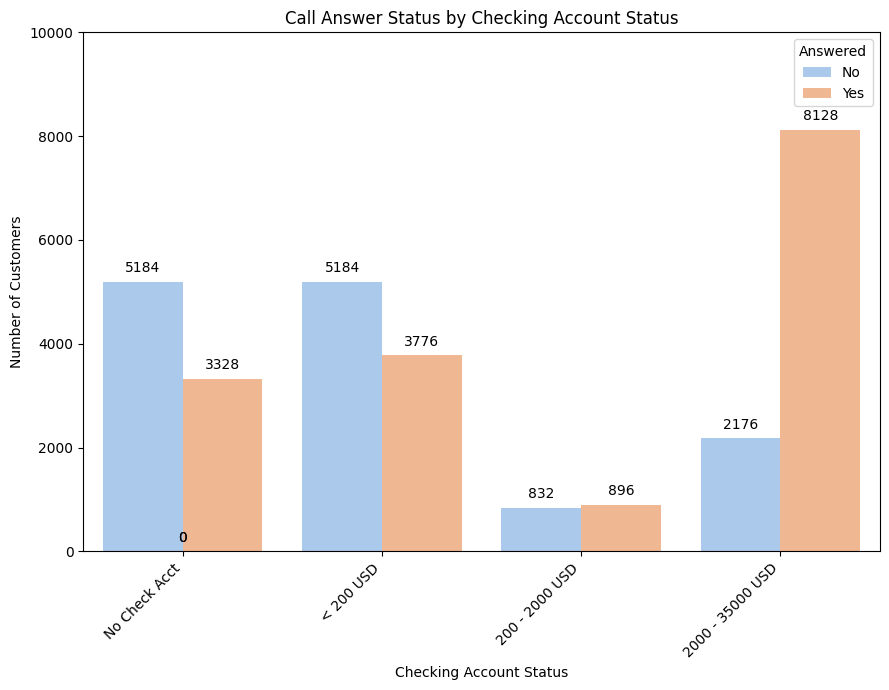

In [54]:
# Chart 5 🔧
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 7))

# Subplot 1: Answered vs. Checking Account Status
ax = sns.countplot(data=df, x='chk_acct', hue='answered', palette='pastel')
plt.title('Call Answer Status by Checking Account Status')
plt.xlabel('Checking Account Status')
plt.ylabel('Number of Customers')
plt.legend(title='Answered', labels=['No', 'Yes'])
plt.ylim(0,10000)

# Customizing x-axis labels for chk_acct
chk_acct_labels = {
    0: 'No Check Acct',
    1: '< 200 USD',
    2: '200 - 2000 USD',
    3: '2000 - 35000 USD',
    4: '>= 3500 USD'
}

# Get unique chk_acct values present in the dataframe to only label existing categories
present_chk_acct_values = sorted(df['chk_acct'].dropna().unique())
filtered_chk_acct_labels = {k: v for k, v in chk_acct_labels.items() if k in present_chk_acct_values}

plt.xticks(ticks=sorted(filtered_chk_acct_labels.keys()), labels=[filtered_chk_acct_labels[key] for key in sorted(filtered_chk_acct_labels.keys())], rotation=45, ha='right')

# Add labels on top of each bar
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

# Step 3: Summarize Your Findings
Question 3.1: Are all of the variables useful and applicable to the business need?  (you should reference the target variable and whether other variables have are likely to be correlated with the target)

### ✍️ Your Response: 🔧
3.1.

Visualizing data I was able to pick out a few correlations between the target variable and other variables. One strong one was those with little or no checking account balance were far more likely to answer than any other balance amount. Another one that is seemingly contradicotry is those in a lower income range seemed more often than not to not answer, as the income increased the histogram showed there were much higher answer rates.

Question 3.2: In what ways could the dataset be improved?  Are there any data quality issues or data types that should be fixed?

### ✍️ Your Response: 🔧
3.2.

I think adding a male categorey would be a good idea, I only see a female variable. The new car variable seemes rather un related and probably not somehting that would have much of an impact on the predictability of answering the call or not.

## Submission Instructions

✅ **Before submitting:**
- Make sure all code cells are run and outputs are visible  
- All markdown questions are answered thoughtfully  
- Submit the assignment as an **HTML file** on Canvas

In [ ]:
!jupyter nbconvert --to html "assignment_04_FugalEric.ipynb"